In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

In [3]:
df = pd.read_csv('C:/Users/IgorM/Desktop/STUDIA/SEM6/METODY SZTUCZNEJ INTELIGENCJI PROJECT/mobile_phone_data_set.csv',delimiter=';')
print(df[:0])

Empty DataFrame
Columns: [User ID, Device Model, Operating System, App Usage Time (min/day), Screen On Time (hours/day), Battery Drain (mAh/day), Number of Apps Installed, Data Usage (MB/day), Age, Gender, User Behavior Class]
Index: []


<Axes: xlabel='Screen On Time (hours/day)', ylabel='User Behavior Class'>

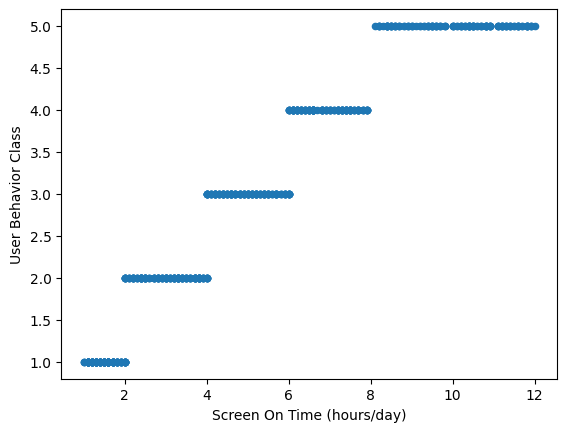

In [4]:
df.plot(kind='scatter', x='Screen On Time (hours/day)', y='User Behavior Class')

Możemy zauważyć, że klasyfikacja w naszym datasecie zależy tylko od "Screen On Time". Na podstawie spędzonej liczby godzin przed ekranem jest przydzielany do etykiety od 1-5

In [5]:
metrics = [x for x in df[:0]]
for metric in metrics:
    print(df[metric].value_counts())
    print()

User ID
700    1
1      1
2      1
3      1
4      1
      ..
32     1
33     1
34     1
35     1
36     1
Name: count, Length: 700, dtype: int64

Device Model
Xiaomi Mi 11          146
iPhone 12             146
Google Pixel 5        142
OnePlus 9             133
Samsung Galaxy S21    133
Name: count, dtype: int64

Operating System
Android    554
iOS        146
Name: count, dtype: int64

App Usage Time (min/day)
64     7
152    5
138    5
225    5
78     5
      ..
127    1
163    1
481    1
499    1
268    1
Name: count, Length: 387, dtype: int64

Screen On Time (hours/day)
1.6     21
2.0     17
1.1     17
6.6     15
1.3     15
        ..
12.0     1
8.1      1
8.3      1
9.1      1
6.7      1
Name: count, Length: 108, dtype: int64

Battery Drain (mAh/day)
490     4
558     3
417     3
590     3
2911    3
       ..
2422    1
1082    1
942     1
431     1
2956    1
Name: count, Length: 628, dtype: int64

Number of Apps Installed
16    16
10    16
18    15
15    14
45    14
      ..
94  

Ile razy dana wartość występuje w naszym datasecie

In [6]:
avg = df.groupby('Device Model').agg(
        {'App Usage Time (min/day)': 'mean',
          'Screen On Time (hours/day)': 'mean',
          'Battery Drain (mAh/day)': 'mean',
          'Number of Apps Installed': 'mean',
          'Data Usage (MB/day)': 'mean',
          'Age': 'mean',
          'Gender': lambda x: x.mode()[0],
          })
print(avg)


                    App Usage Time (min/day)  Screen On Time (hours/day)  \
Device Model                                                               
Google Pixel 5                    267.788732                    5.076056   
OnePlus 9                         270.383459                    5.241353   
Samsung Galaxy S21                266.421053                    5.318045   
Xiaomi Mi 11                      268.452055                    5.293151   
iPhone 12                         282.020548                    5.430822   

                    Battery Drain (mAh/day)  Number of Apps Installed  \
Device Model                                                            
Google Pixel 5                  1475.676056                 49.908451   
OnePlus 9                       1523.849624                 49.969925   
Samsung Galaxy S21              1504.571429                 50.804511   
Xiaomi Mi 11                    1528.876712                 49.924658   
iPhone 12                    

In [7]:
X = df.drop(columns=['Device Model','User Behavior Class','User ID'])
y = df['Device Model']

Rozdzielamy nasze cechy i etykiete 

In [8]:
X_encoded = pd.get_dummies(X)

Do dalszej analizy zamieniamy zmienne tekstowe na zmienne numeryczne

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.20, random_state=42)
model = GaussianNB()
model.fit(X_train, y_train)
predictions = model.predict(X_test)

In [10]:
accuracy_score_result = accuracy_score(y_test, predictions)
print("Dokładność:", accuracy_score_result)

Dokładność: 0.42142857142857143


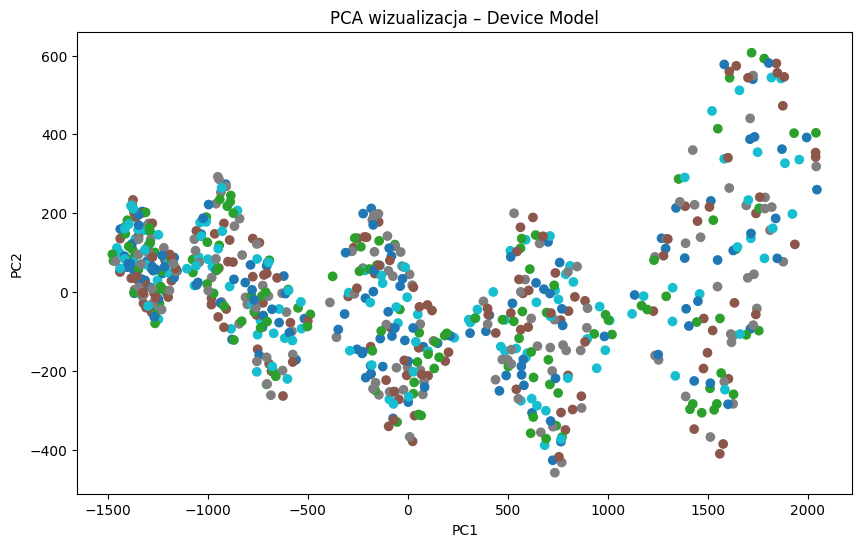

In [11]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_encoded)

plt.figure(figsize=(10, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=pd.factorize(y)[0], cmap='tab10')
plt.title("PCA wizualizacja – Device Model")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()

In [12]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
model.fit(X_train, y_train)

importances = model.feature_importances_
for name, score in zip(X_train.columns, importances):
    print(f"{name}: {score:.4f}")

App Usage Time (min/day): 0.1228
Screen On Time (hours/day): 0.1074
Battery Drain (mAh/day): 0.1295
Number of Apps Installed: 0.1105
Data Usage (MB/day): 0.1269
Age: 0.1203
Operating System_Android: 0.1358
Operating System_iOS: 0.1173
Gender_Female: 0.0153
Gender_Male: 0.0142


Wykorzystujemy algorytm RandomForestClassifier do obliczenia oraz wyświetlenia ważności naszych cech dla każdej zmiennej wejściowej